#Google drive connecting

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Library Packages

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

## Loading Dataset of eba2017scoreddata

In [6]:
data_path1 = '/content/drive/MyDrive/AnalysisData/eba2017scoreddata/AccessingFinance2017.xlsx'

AccessingFinance2017 = pd.read_excel(data_path1)
AccessingFinance2017.head()

,EconomyCode,EconomyName,WH_Law_QYN,WH_Law_QYN_SC,WH_PerfGuarantees,WH_PerfGuarantees_ABond,WH_PerfGuarantees_AIndemnity,WH_PerfGuarantees_AInsurance,WH_PerfGuarantees_SC,WH_Negotiable_QYN,...,account_DP,account_SC,Creditor_DP,Creditor_SC,MFI_DP,MFI_SC,Agent_DP,Agent_SC,Emoney_DP,Emoney_SC
0,AFG,Afghanistan,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,No,0,Yes,1,No,0,Yes,1
1,AGO,Angola,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,No,0,No,0,Yes,1,No,0
2,ARG,Argentina,Yes,1,NaN,Yes,Yes,Yes,1,Yes,...,Yes,1,No,0,NaN,1,NaN,1,NaN,1
3,ARM,Armenia,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,No,0,No,0,No,0,Yes,1
4,AUS,Australia,Yes,1,NaN,No,No,No,0,Yes,...,Yes,1,Yes,1,NaN,1,NaN,1,NaN,1


In [7]:
data_path2 = '/content/drive/MyDrive/AnalysisData/eba2017scoreddata/ProtectingPlantHealth2017.xlsx'

ProtectingPlantHealth2017 = pd.read_excel(data_path2)
ProtectingPlantHealth2017.head()

,EconomyCode,EconomyName,InfoPestsComprehensive,InfoPests_SC,PestOutbreak,PestOutbreak_SC,IPPC&QuarantineWeb,IPPC&QuarantineWeb_SC,AgencyPRA,AgencyPRA_SC,ImportInspections,ImportInspections_SC
0,AFG,Afghanistan,No,0,Yes,1.0,No,0,Yes,1,No,0
1,AGO,Angola,No,0,No,0.0,Yes,1,No,0,No,0
2,ARG,Argentina,No,0,Yes,1.0,Yes,1,Yes,1,No,0
3,ARM,Armenia,No,0,No,0.0,Yes,1,Yes,1,No,0
4,AUS,Australia,Yes,1,Yes,1.0,No,0,Yes,1,Yes,1


In [8]:
data_path3 = '/content/drive/MyDrive/AnalysisData/eba2017scoreddata/RegisteringFertilizer2017.xlsx'

RegisteringFertilizer2017 = pd.read_excel(data_path3)
RegisteringFertilizer2017.head()

,EconomyCode,EconomyName,FERRegPrLeg_DP,FERRegPrLeg_SC,FERRegLim_DP,FERRegLim_SC,FERRegCatOnli_DP,FERRegCatUpd_SC,FERRegReRe_DP,FERRegReRe_SC,FERQuaLabLan_DP,FERQuaLab_SC,FERQuaProbHMet_DP,FERQuaProbHMet_SC,FER_Time,FER_Cost
0,AFG,Afghanistan,Yes,1,1,0,No,0,NaN,0,No,0,Yes,1,12,74.5
1,AGO,Angola,No,0,NaN,0,NaN,0,NaN,0,No,0,No,0,NaN,NaN
2,ARG,Argentina,Yes,1,1,0,Yes,1,NaN,0,Yes,1,Yes,1,120,41.2
3,ARM,Armenia,No,0,NaN,0,NaN,0,NaN,0,Yes,1,No,0,NaN,NaN
4,AUS,Australia,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored


In [9]:
data_path4 = '/content/drive/MyDrive/AnalysisData/eba2017scoreddata/RegisteringMachinery2017.xlsx'

RegisteringMachinery2017 = pd.read_excel(data_path4)
RegisteringMachinery2017.head()

,EconomyCode,EconomyName,MEC_Time,MEC_Cost_GNI
0,AFG,Afghanistan,No practice,No practice
1,AGO,Angola,No practice,No practice
2,ARG,Argentina,4,1.9
3,ARM,Armenia,3,0.3
4,AUS,Australia,1,0.1


In [10]:
data_path5 = '/content/drive/MyDrive/AnalysisData/eba2017scoreddata/SecuringWater2017.xlsx'

SecuringWater2017 = pd.read_excel(data_path5)
SecuringWater2017.head()

,EconomyCode,EconomyName,Registry_public_availability,Registry_public_availability_SC,Monitoring_public_availability,Monitoring_public_availability_SC,Water_user_representation,Water_user_representation_SC,Plan_updating,Plan_updating_SC,...,Plan_binding,Plan_binding_SC,Permit_public_notice,Permit_public_notice_SC,Permit_notice_length,Permit_notice_length_SC,Women_representation,Women_representation_SC,NonPoint_permit,NonPoint_permit_SC
0,AFG,Afghanistan,No,0,No,0,Yes,1,No,0,...,No,0,No,0,No,0,No,0,No,0
1,AGO,Angola,No,0,Yes,1,No,0,Yes,1,...,Yes,1,Yes,1,Yes,1,No,0,Yes,1
2,ARG,Argentina,Yes,1,Yes,1,Yes,1,No,0,...,No,0,Yes,1,Yes,1,No,0,No,0
3,ARM,Armenia,Yes,1,Yes,1,Yes,1,No,0,...,Yes,1,Yes,1,Yes,1,No,0,No,0
4,AUS,Australia,Yes,1,Yes,1,Yes,1,Yes,1,...,Yes,1,Yes,1,Yes,1,No,0,No,0


In [11]:
data_path6 = '/content/drive/MyDrive/AnalysisData/eba2017scoreddata/SupplyingSeed2017.xlsx'

SupplyingSeed2017 = pd.read_excel(data_path6)
SupplyingSeed2017.head()

,EconomyCode,EconomyName,VRAutoReg,VRAutoReg_SC,VRDUSForeign,VRDUSForeign_SC,VRCMeet,VRCMeet_SC,VRCatalogue,VRCatalog_SC,...,PBRDom,PBRDom_SC,QCAccredCert,QCAccredCert_SC,QCCertFee,QCCertFee_SC,PBRAccessGR,PBRAccessGR_SC,SEE_Time,SEE_Cost
0,AFG,Afghanistan,No,0,No,0,Yes,1,Yes,1,...,Yes,1,Yes,1,No,0,No,0,No practice,No practice
1,AGO,Angola,Yes,1,No,0,Yes,1,No,0,...,Yes,1,Yes,1,No,0,No,0,No practice,No practice
2,ARG,Argentina,No,0,Yes,1,Yes,1,Yes,1,...,Yes,1,Yes,1,Yes,1,No,0,351,21.1
3,ARM,Armenia,No,0,Yes,1,Yes,1,Yes,1,...,Yes,1,Yes,1,No,0,No,0,587,18.5
4,AUS,Australia,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,...,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored


In [12]:
data_path7 = '/content/drive/MyDrive/AnalysisData/eba2017scoreddata/SustainingLivestock2017.xlsx'

SustainingLivestock2017 = pd.read_excel(data_path7)
SustainingLivestock2017.head()

,EconomyCode,EconomyName,F_ApFk_RQ,F_ApFk_RQ_SC,F_OpFk_InspkX,F_OpFk_InspkX_SC,F_MRC_LblX,F_MRC_lbrq_SC,F_MRC_Lbl_BulkX,F_MRC_Lbl_BulkX_SC,...,VMP_Dos_Chk_Ntfy_VL,VMP_Dos_Chk_Ntfy_VL_SC,VMP_RgPro_Lst_On,VMP_RgPro_Lst_On_SC,VMP_RgPro_DosGenX,VMP_RgPro_DosGen_LP_SC,VMP_RgPro_PrpTMe_VL,VMP_RgPro_Gen_Pro_Per_LP_SC,VMP_MRC_P_RQX,VMP_MRC_P_RQ_LP_SC
0,AFG,Afghanistan,No,0,No,0,No,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,AGO,Angola,Yes,1,No,0,No,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,ARG,Argentina,Yes,1,No,0,Yes,1,Yes,1,...,Yes,1,Yes,1,No,0,NaN,0,Yes,1
3,ARM,Armenia,No,0,No,0,Yes,1,Yes,1,...,Yes,1,Yes,1,Yes,1,Yes,1,No,0
4,AUS,Australia,No,0,No,0,Yes,1,No,0,...,Yes,1,Yes,1,Yes,1,Yes,1,Yes,1


In [13]:
data_path8 = '/content/drive/MyDrive/AnalysisData/eba2017scoreddata/TradingFood2017.xlsx'

TradingFood2017 = pd.read_excel(data_path8)
TradingFood2017.head()

,EconomyCode,EconomyName,EBA_Mandatory_Licences_Memberships_Flip,EBA_Mandatory_Licences_Memberships_SC,EBA_Phyto_Apply_Electronically,EBA_Phyto_Apply_Electronically_SC,EBA_ePhyto_NPPOs,EBA_ePhyto_NPPOs_SC,EBA_Phyto_On site,EBA_Phyto_On site_SC,EBA_Available_Phyto Fee,EBA_Available_Phyto Fee_SC,POCap,POCap_SC,TradGend,TradGend_SC,Trade_product,Trade_partner,EBA_PerShipment_Time_Total,EBA_PerShipment_Cost_Total
0,AFG,Afghanistan,No,0,No,0,No,0,No,0,No,0,Yes,1,Yes,1,HS 08 : Edible fruit and nuts; peel of citrus ...,India,3,31
1,AGO,Angola,Yes,1,No,0,No,0,No,0,Yes,1,Yes,1,Yes,1,"HS 09 : Coffee, tea, matï and spices",Portugal,24,50
2,ARG,Argentina,Yes,1,Yes,1,Yes,1,No,0,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Brazil,48,7
3,ARM,Armenia,Yes,1,No,0,No,0,No,0,Yes,1,Yes,1,Yes,1,HS 24 : Tobacco and manufactured tobacco subst...,Iraq,24,0
4,AUS,Australia,No,0,Yes,1,Yes,1,Yes,1,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Indonesia,3,47


## Loading Dataset of eba2019scoreddata

In [14]:
data_path1 = '/content/drive/MyDrive/AnalysisData/eba2019scoreddata/AccessingFinance2019.xlsx'

AccessingFinance2019 = pd.read_excel(data_path1)
AccessingFinance2019.head()

,EconomyCode,EconomyName,WH_Law_QYN,WH_Law_QYN_SC,WH_PerfGuarantees,WH_PerfGuarantees_ABond,WH_PerfGuarantees_AIndemnity,WH_PerfGuarantees_AInsurance,WH_PerfGuarantees_SC,WH_Negotiable_QYN,...,account_DP,account_SC,Creditor_DP,Creditor_SC,MFI_DP,MFI_SC,Agent_DP,Agent_SC,Emoney_DP,Emoney_SC
0,AFG,Afghanistan,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,No,0,Yes,1,No,0,Yes,1
1,AGO,Angola,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,Yes,1,No,0,Yes,1,No,0
2,ARG,Argentina,Yes,1,NaN,Yes,Yes,Yes,1,Yes,...,Yes,1,No,0,NaN,1,NaN,1,NaN,1
3,ARM,Armenia,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,No,0,No,0,No,0,Yes,1
4,AUS,Australia,Yes,1,NaN,No,No,No,0,Yes,...,Yes,1,Yes,1,NaN,1,NaN,1,NaN,1


In [15]:
data_path2 = '/content/drive/MyDrive/AnalysisData/eba2019scoreddata/ProtectingPlantHealth2019.xlsx'

ProtectingPlantHealth2019 = pd.read_excel(data_path2)
ProtectingPlantHealth2019.head()

,EconomyCode,EconomyName,InfoPestsComprehensive,InfoPests_SC,PestOutbreak,PestOutbreak_SC,IPPC&QuarantineWeb,IPPC&QuarantineWeb_SC,AgencyPRA,AgencyPRA_SC,ImportInspections,ImportInspections_SC
0,AFG,Afghanistan,No,0,Yes,1.0,No,0,Yes,1,No,0
1,AGO,Angola,No,0,No,0.0,Yes,1,No,0,No,0
2,ARG,Argentina,No,0,Yes,1.0,Yes,1,Yes,1,No,0
3,ARM,Armenia,Yes,1,No,0.0,Yes,1,Yes,1,No,0
4,AUS,Australia,Yes,1,Yes,1.0,No,0,Yes,1,Yes,1


In [16]:
data_path3 = '/content/drive/MyDrive/AnalysisData/eba2019scoreddata/RegisteringFertilizer2019.xlsx'

RegisteringFertilizer2019 = pd.read_excel(data_path3)
RegisteringFertilizer2019.head()

,EconomyCode,EconomyName,FERRegPrLeg_DP,FERRegPrLeg_SC,FERRegLim_DP,FERRegLim_SC,FERRegCatOnli_DP,FERRegCatUpd_SC,FERRegReRe_DP,FERRegReRe_SC,FERQuaLabLan_DP,FERQuaLab_SC,FERQuaProbHMet_DP,FERQuaProbHMet_SC,FER_Time,FER_Cost
0,AFG,Afghanistan,Yes,1,1,0,No,0,NaN,0,No,0,Yes,1,12,69.1
1,AGO,Angola,No,0,NaN,0,NaN,0,NaN,0,No,0,No,0,NaN,NaN
2,ARG,Argentina,Yes,1,1,0,Yes,1,NaN,0,Yes,1,Yes,1,120,23.7
3,ARM,Armenia,Yes,1,5,0,Yes,1,No,0,Yes,1,No,0,30,0.0
4,AUS,Australia,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored


In [17]:
data_path4 = '/content/drive/MyDrive/AnalysisData/eba2019scoreddata/RegisteringMachinery2019.xlsx'

RegisteringMachinery2019 = pd.read_excel(data_path4)
RegisteringMachinery2019.head()

,EconomyCode,EconomyName,MEC_Time,MEC_Cost_GNI
0,AFG,Afghanistan,No practice,No practice
1,AGO,Angola,No practice,No practice
2,ARG,Argentina,4,1.1
3,ARM,Armenia,3,0.3
4,AUS,Australia,1,0.1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('EconomyCode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('EconomyName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('MEC_Time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('MEC_Cost_GNI').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('EconomyCode')):
  _plot_series(series, series_name, i)
  fig.legend(title='EconomyCode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('EconomyName')):
  _plot_series(series, series_name, i)
  fig.legend(title='EconomyName', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MEC_Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='MEC_Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MEC_Cost_GNI')):
  _plot_series(series, series_name, i)
  fig.legend(title='MEC_Cost_GNI', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EconomyName'].value_counts()
    for x_label, grp in _df_10.groupby('EconomyCode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('EconomyCode')
_ = plt.ylabel('EconomyName')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MEC_Time'].value_counts()
    for x_label, grp in _df_11.groupby('EconomyName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('EconomyName')
_ = plt.ylabel('MEC_Time')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MEC_Cost_GNI'].value_counts()
    for x_label, grp in _df_12.groupby('MEC_Time')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MEC_Time')
_ = plt.ylabel('MEC_Cost_GNI')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['EconomyCode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='EconomyCode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['EconomyName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='index', y='EconomyName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['MEC_Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='MEC_Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['MEC_Cost_GNI'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='MEC_Cost_GNI', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [18]:
data_path5 = '/content/drive/MyDrive/AnalysisData/eba2019scoreddata/SecuringWater2019.xlsx'

SecuringWater2019 = pd.read_excel(data_path5)
SecuringWater2019.head()

,EconomyCode,EconomyName,Registry_public_availability,Registry_public_availability_SC,Monitoring_public_availability,Monitoring_public_availability_SC,Water_user_representation,Water_user_representation_SC,Plan_updating,Plan_updating_SC,...,Plan_binding,Plan_binding_SC,Permit_public_notice,Permit_public_notice_SC,Permit_notice_length,Permit_notice_length_SC,Women_representation,Women_representation_SC,NonPoint_permit,NonPoint_permit_SC
0,AFG,Afghanistan,No,0,No,0,Yes,1,No,0,...,No,0,No,0,No,0,No,0,No,0
1,AGO,Angola,No,0,Yes,1,No,0,Yes,1,...,Yes,1,Yes,1,Yes,1,No,0,Yes,1
2,ARG,Argentina,Yes,1,Yes,1,Yes,1,No,0,...,No,0,Yes,1,Yes,1,No,0,No,0
3,ARM,Armenia,Yes,1,Yes,1,Yes,1,Yes,1,...,Yes,1,Yes,1,Yes,1,No,0,No,0
4,AUS,Australia,Yes,1,Yes,1,Yes,1,Yes,1,...,Yes,1,Yes,1,Yes,1,No,0,No,0


In [19]:
data_path6 = '/content/drive/MyDrive/AnalysisData/eba2019scoreddata/SupplyingSeed2019.xlsx'

SupplyingSeed2019 = pd.read_excel(data_path6)
SupplyingSeed2019.head()

,EconomyCode,EconomyName,VRAutoReg,VRAutoReg_SC,VRDUSForeign,VRDUSForeign_SC,VRCMeet,VRCMeet_SC,VRCatalogue,VRCatalog_SC,...,PBRDom,PBRDom_SC,QCAccredCert,QCAccredCert_SC,QCCertFee,QCCertFee_SC,PBRAccessGR,PBRAccessGR_SC,SEE_Time,SEE_Cost
0,AFG,Afghanistan,No,0,No,0,Yes,1,Yes,1,...,Yes,1,Yes,1,No,0,No,0,No practice,No practice
1,AGO,Angola,Yes,1,No,0,Yes,1,No,0,...,Yes,1,Yes,1,No,0,No,0,No practice,No practice
2,ARG,Argentina,No,0,Yes,1,Yes,1,Yes,1,...,Yes,1,Yes,1,Yes,1,No,0,351,12.2
3,ARM,Armenia,No,0,Yes,1,Yes,1,Yes,1,...,Yes,1,Yes,1,No,0,No,0,587,16.2
4,AUS,Australia,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,...,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored,Not scored


from matplotlib import pyplot as plt
import seaborn as sns
_df_17.groupby('EconomyCode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('EconomyName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('VRAutoReg').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('VRAutoReg_SC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['VRCatUpdate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'VRCatUpdate'}, axis=1)
              .sort_values('VRCatUpdate', ascending=True))
  xs = counted['VRCatUpdate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('VRCatUpdate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('EconomyCode')):
  _plot_series(series, series_name, i)
  fig.legend(title='EconomyCode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('VRCatUpdate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['VRCatUpdate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'VRCatUpdate'}, axis=1)
              .sort_values('VRCatUpdate', ascending=True))
  xs = counted['VRCatUpdate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('VRCatUpdate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('EconomyName')):
  _plot_series(series, series_name, i)
  fig.legend(title='EconomyName', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('VRCatUpdate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['VRCatUpdate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'VRCatUpdate'}, axis=1)
              .sort_values('VRCatUpdate', ascending=True))
  xs = counted['VRCatUpdate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('VRCatUpdate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('VRAutoReg')):
  _plot_series(series, series_name, i)
  fig.legend(title='VRAutoReg', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('VRCatUpdate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['VRCatUpdate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'VRCatUpdate'}, axis=1)
              .sort_values('VRCatUpdate', ascending=True))
  xs = counted['VRCatUpdate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('VRCatUpdate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('VRAutoReg_SC')):
  _plot_series(series, series_name, i)
  fig.legend(title='VRAutoReg_SC', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('VRCatUpdate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EconomyName'].value_counts()
    for x_label, grp in _df_25.groupby('EconomyCode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('EconomyCode')
_ = plt.ylabel('EconomyName')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VRAutoReg'].value_counts()
    for x_label, grp in _df_26.groupby('EconomyName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('EconomyName')
_ = plt.ylabel('VRAutoReg')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VRAutoReg_SC'].value_counts()
    for x_label, grp in _df_27.groupby('VRAutoReg')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('VRAutoReg')
_ = plt.ylabel('VRAutoReg_SC')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VRDUSForeign'].value_counts()
    for x_label, grp in _df_28.groupby('VRAutoReg_SC')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('VRAutoReg_SC')
_ = plt.ylabel('VRDUSForeign')

In [20]:
data_path7 = '/content/drive/MyDrive/AnalysisData/eba2019scoreddata/SustainingLivestock2019.xlsx'

SustainingLivestock2019 = pd.read_excel(data_path7)
SustainingLivestock2019.head()

,EconomyCode,EconomyName,F_ApFk_RQ,F_ApFk_RQ_SC,F_OpFk_InspkX,F_OpFk_InspkX_SC,F_MRC_LblX,F_MRC_lbrq_SC,F_MRC_Lbl_BulkX,F_MRC_Lbl_BulkX_SC,...,VMP_Dos_Chk_Ntfy_VL,VMP_Dos_Chk_Ntfy_VL_SC,VMP_RgPro_Lst_On,VMP_RgPro_Lst_On_SC,VMP_RgPro_DosGenX,VMP_RgPro_DosGen_LP_SC,VMP_RgPro_PrpTMe_VL,VMP_RgPro_Gen_Pro_Per_LP_SC,VMP_MRC_P_RQX,VMP_MRC_P_RQ_LP_SC
0,AFG,Afghanistan,No,0,No,0,No,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,AGO,Angola,Yes,1,No,0,No,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,ARG,Argentina,Yes,1,No,0,Yes,1,Yes,1,...,Yes,1,Yes,1,No,0,NaN,0,Yes,1
3,ARM,Armenia,No,0,No,0,Yes,1,Yes,1,...,Yes,1,Yes,1,Yes,1,Yes,1,No,0
4,AUS,Australia,No,0,No,0,Yes,1,No,0,...,Yes,1,Yes,1,Yes,1,Yes,1,Yes,1


In [21]:
data_path8 = '/content/drive/MyDrive/AnalysisData/eba2019scoreddata/TradingFood2019.xlsx'

TradingFood2019 = pd.read_excel(data_path8)
TradingFood2019.head()

,EconomyCode,EconomyName,EBA_Mandatory_Licences_Memberships_Flip,EBA_Mandatory_Licences_Memberships_SC,EBA_Phyto_Apply_Electronically,EBA_Phyto_Apply_Electronically_SC,EBA_ePhyto_NPPOs,EBA_ePhyto_NPPOs_SC,EBA_Phyto_On site,EBA_Phyto_On site_SC,EBA_Available_Phyto Fee,EBA_Available_Phyto Fee_SC,POCap,POCap_SC,TradGend,TradGend_SC,Trade_product,Trade_partner,EBA_PerShipment_Time_Total,EBA_PerShipment_Cost_Total
0,AFG,Afghanistan,No,0,No,0,No,0,No,0,No,0,Yes,1,Yes,1,HS 08 : Edible fruit and nuts; peel of citrus ...,India,3,31
1,AGO,Angola,Yes,1,No,0,No,0,No,0,Yes,1,Yes,1,Yes,1,"HS 09 : Coffee, tea, matï and spices",Portugal,24,50
2,ARG,Argentina,Yes,1,Yes,1,Yes,1,No,0,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Brazil,48,7
3,ARM,Armenia,Yes,1,No,0,No,0,No,0,Yes,1,Yes,1,Yes,1,HS 24 : Tobacco and manufactured tobacco subst...,Iraq,24,0
4,AUS,Australia,No,0,Yes,1,Yes,1,Yes,1,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Indonesia,3,47


In [22]:
merged_2017 = pd.merge(AccessingFinance2017, ProtectingPlantHealth2017, on='EconomyCode', how='inner')
merged_2017 = pd.merge(merged_2017, RegisteringFertilizer2017, on='EconomyCode', how='inner')
merged_2017 = pd.merge(merged_2017, RegisteringMachinery2017, on='EconomyCode', how='inner')
merged_2017 = pd.merge(merged_2017, SecuringWater2017, on='EconomyCode', how='inner')
merged_2017 = pd.merge(merged_2017, SupplyingSeed2017, on='EconomyCode', how='inner')
merged_2017 = pd.merge(merged_2017, SustainingLivestock2017, on='EconomyCode', how='inner')
merged_2017 = pd.merge(merged_2017, TradingFood2017, on='EconomyCode', how='inner')

merged_2019 = pd.merge(AccessingFinance2019, ProtectingPlantHealth2019, on='EconomyCode', how='inner')
merged_2019 = pd.merge(merged_2019, RegisteringFertilizer2019, on='EconomyCode', how='inner')
merged_2019 = pd.merge(merged_2019, RegisteringMachinery2019, on='EconomyCode', how='inner')
merged_2019 = pd.merge(merged_2019, SecuringWater2019, on='EconomyCode', how='inner')
merged_2019 = pd.merge(merged_2019, SupplyingSeed2019, on='EconomyCode', how='inner')
merged_2019 = pd.merge(merged_2019, SustainingLivestock2019, on='EconomyCode', how='inner')
merged_2019 = pd.merge(merged_2019, TradingFood2019, on='EconomyCode', how='inner')

<ipython-input-22-985776a40587>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'EconomyName_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_2017 = pd.merge(merged_2017, RegisteringMachinery2017, on='EconomyCode', how='inner')
<ipython-input-22-985776a40587>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'EconomyName_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_2017 = pd.merge(merged_2017, SupplyingSeed2017, on='EconomyCode', how='inner')
<ipython-input-22-985776a40587>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'EconomyName_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_2017 = pd.merge(merged_2017, TradingFood2017, on='EconomyCode', how='inner')
<ipython-input-22-985776a40587>:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'EconomyName_x'} in the result is deprecated and

# Merging 2017 Dataset

In [23]:
merged_2017.head()

,EconomyCode,EconomyName_x,WH_Law_QYN,WH_Law_QYN_SC,WH_PerfGuarantees,WH_PerfGuarantees_ABond,WH_PerfGuarantees_AIndemnity,WH_PerfGuarantees_AInsurance,WH_PerfGuarantees_SC,WH_Negotiable_QYN,...,EBA_Available_Phyto Fee,EBA_Available_Phyto Fee_SC,POCap,POCap_SC,TradGend,TradGend_SC,Trade_product,Trade_partner,EBA_PerShipment_Time_Total,EBA_PerShipment_Cost_Total
0,AFG,Afghanistan,No,0,NaN,NaN,NaN,NaN,0,NaN,...,No,0,Yes,1,Yes,1,HS 08 : Edible fruit and nuts; peel of citrus ...,India,3,31
1,AGO,Angola,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,Yes,1,Yes,1,"HS 09 : Coffee, tea, matï and spices",Portugal,24,50
2,ARG,Argentina,Yes,1,NaN,Yes,Yes,Yes,1,Yes,...,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Brazil,48,7
3,ARM,Armenia,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,Yes,1,Yes,1,HS 24 : Tobacco and manufactured tobacco subst...,Iraq,24,0
4,AUS,Australia,Yes,1,NaN,No,No,No,0,Yes,...,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Indonesia,3,47


# Merging 2019 Dataset

In [24]:
merged_2019.head()

,EconomyCode,EconomyName_x,WH_Law_QYN,WH_Law_QYN_SC,WH_PerfGuarantees,WH_PerfGuarantees_ABond,WH_PerfGuarantees_AIndemnity,WH_PerfGuarantees_AInsurance,WH_PerfGuarantees_SC,WH_Negotiable_QYN,...,EBA_Available_Phyto Fee,EBA_Available_Phyto Fee_SC,POCap,POCap_SC,TradGend,TradGend_SC,Trade_product,Trade_partner,EBA_PerShipment_Time_Total,EBA_PerShipment_Cost_Total
0,AFG,Afghanistan,No,0,NaN,NaN,NaN,NaN,0,NaN,...,No,0,Yes,1,Yes,1,HS 08 : Edible fruit and nuts; peel of citrus ...,India,3,31
1,AGO,Angola,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,Yes,1,Yes,1,"HS 09 : Coffee, tea, matï and spices",Portugal,24,50
2,ARG,Argentina,Yes,1,NaN,Yes,Yes,Yes,1,Yes,...,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Brazil,48,7
3,ARM,Armenia,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,Yes,1,Yes,1,HS 24 : Tobacco and manufactured tobacco subst...,Iraq,24,0
4,AUS,Australia,Yes,1,NaN,No,No,No,0,Yes,...,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Indonesia,3,47


In [25]:
merged_2017_To_2019 = pd.merge(merged_2017, merged_2019, on='EconomyCode', how='inner')
merged_2017_To_2019.head()

,EconomyCode,EconomyName_x_x,WH_Law_QYN_x,WH_Law_QYN_SC_x,WH_PerfGuarantees_x,WH_PerfGuarantees_ABond_x,WH_PerfGuarantees_AIndemnity_x,WH_PerfGuarantees_AInsurance_x,WH_PerfGuarantees_SC_x,WH_Negotiable_QYN_x,...,EBA_Available_Phyto Fee_y,EBA_Available_Phyto Fee_SC_y,POCap_y,POCap_SC_y,TradGend_y,TradGend_SC_y,Trade_product_y,Trade_partner_y,EBA_PerShipment_Time_Total_y,EBA_PerShipment_Cost_Total_y
0,AFG,Afghanistan,No,0,NaN,NaN,NaN,NaN,0,NaN,...,No,0,Yes,1,Yes,1,HS 08 : Edible fruit and nuts; peel of citrus ...,India,3,31
1,AGO,Angola,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,Yes,1,Yes,1,"HS 09 : Coffee, tea, matï and spices",Portugal,24,50
2,ARG,Argentina,Yes,1,NaN,Yes,Yes,Yes,1,Yes,...,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Brazil,48,7
3,ARM,Armenia,No,0,NaN,NaN,NaN,NaN,0,NaN,...,Yes,1,Yes,1,Yes,1,HS 24 : Tobacco and manufactured tobacco subst...,Iraq,24,0
4,AUS,Australia,Yes,1,NaN,No,No,No,0,Yes,...,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Indonesia,3,47


# Display basic information about the dataset

In [26]:
merged_2017_To_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Columns: 275 entries, EconomyCode to EBA_PerShipment_Cost_Total_y
dtypes: float64(4), int64(88), object(183)
memory usage: 217.8+ KB


# Checking for missing values

In [27]:
missing_values = merged_2017_To_2019.isnull().sum()
print(missing_values)

EconomyCode                       0
EconomyName_x_x                   0
WH_Law_QYN_x                      0
WH_Law_QYN_SC_x                   0
WH_PerfGuarantees_x             101
                               ... 
TradGend_SC_y                     0
Trade_product_y                   0
Trade_partner_y                   0
EBA_PerShipment_Time_Total_y      0
EBA_PerShipment_Cost_Total_y      0
Length: 275, dtype: int64


# Remove missing values (NaN) from the Dataset

In [28]:
merged_2017_To_2019.fillna(0, inplace=True)

In [29]:
merged_2017_To_2019.isnull().sum()

EconomyCode                     0
EconomyName_x_x                 0
WH_Law_QYN_x                    0
WH_Law_QYN_SC_x                 0
WH_PerfGuarantees_x             0
                               ..
TradGend_SC_y                   0
Trade_product_y                 0
Trade_partner_y                 0
EBA_PerShipment_Time_Total_y    0
EBA_PerShipment_Cost_Total_y    0
Length: 275, dtype: int64

In [30]:
merged_2017_To_2019.head()

,EconomyCode,EconomyName_x_x,WH_Law_QYN_x,WH_Law_QYN_SC_x,WH_PerfGuarantees_x,WH_PerfGuarantees_ABond_x,WH_PerfGuarantees_AIndemnity_x,WH_PerfGuarantees_AInsurance_x,WH_PerfGuarantees_SC_x,WH_Negotiable_QYN_x,...,EBA_Available_Phyto Fee_y,EBA_Available_Phyto Fee_SC_y,POCap_y,POCap_SC_y,TradGend_y,TradGend_SC_y,Trade_product_y,Trade_partner_y,EBA_PerShipment_Time_Total_y,EBA_PerShipment_Cost_Total_y
0,AFG,Afghanistan,No,0,0.0,0,0,0,0,0,...,No,0,Yes,1,Yes,1,HS 08 : Edible fruit and nuts; peel of citrus ...,India,3,31
1,AGO,Angola,No,0,0.0,0,0,0,0,0,...,Yes,1,Yes,1,Yes,1,"HS 09 : Coffee, tea, matï and spices",Portugal,24,50
2,ARG,Argentina,Yes,1,0.0,Yes,Yes,Yes,1,Yes,...,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Brazil,48,7
3,ARM,Armenia,No,0,0.0,0,0,0,0,0,...,Yes,1,Yes,1,Yes,1,HS 24 : Tobacco and manufactured tobacco subst...,Iraq,24,0
4,AUS,Australia,Yes,1,0.0,No,No,No,0,Yes,...,Yes,1,Yes,1,Yes,1,HS 10 : Cereals,Indonesia,3,47


# Summary statistics

In [31]:
merged_2017_To_2019.describe()

,WH_Law_QYN_SC_x,WH_PerfGuarantees_x,WH_PerfGuarantees_SC_x,WH_Negotiable_QYN_SC_x,WH_TypeReceipts_SC_x,WH_InfoReceipt_ASecurityInt_SC_x,account_SC_x,Creditor_SC_x,MFI_SC_x,Agent_SC_x,...,VMP_MRC_P_RQ_LP_SC_y,EBA_Mandatory_Licences_Memberships_SC_y,EBA_Phyto_Apply_Electronically_SC_y,EBA_ePhyto_NPPOs_SC_y,EBA_Phyto_On site_SC_y,EBA_Available_Phyto Fee_SC_y,POCap_SC_y,TradGend_SC_y,EBA_PerShipment_Time_Total_y,EBA_PerShipment_Cost_Total_y
count,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000
mean,0.594059,0.0,0.396040,0.574257,0.237624,0.435644,0.970297,0.445545,0.732673,0.663366,...,0.574257,0.712871,0.504950,0.108911,0.396040,0.792079,0.851485,1.0,46.405941,48.653465
std,0.493522,0.0,0.491512,0.496921,0.427750,0.498314,0.170613,0.499505,0.444772,0.474915,...,0.496921,0.454679,0.502469,0.313081,0.491512,0.407844,0.357383,0.0,46.089951,67.053626
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,5.000000,0.000000
50%,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,36.000000,23.000000
75%,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,60.000000,61.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,192.000000,329.000000


#Top 10 Economy Codes

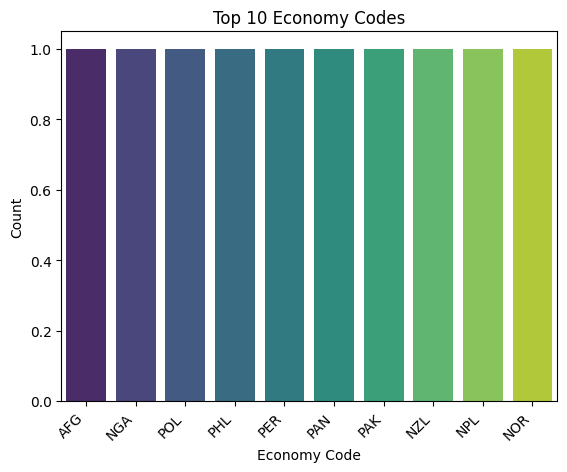

In [32]:
top_10_economies = merged_2017_To_2019['EconomyCode'].value_counts().head(10).index

sns.countplot(x='EconomyCode', data=merged_2017_To_2019, order=top_10_economies, palette='viridis')
plt.title('Top 10 Economy Codes')
plt.xlabel('Economy Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#Top 15 Trade Partners

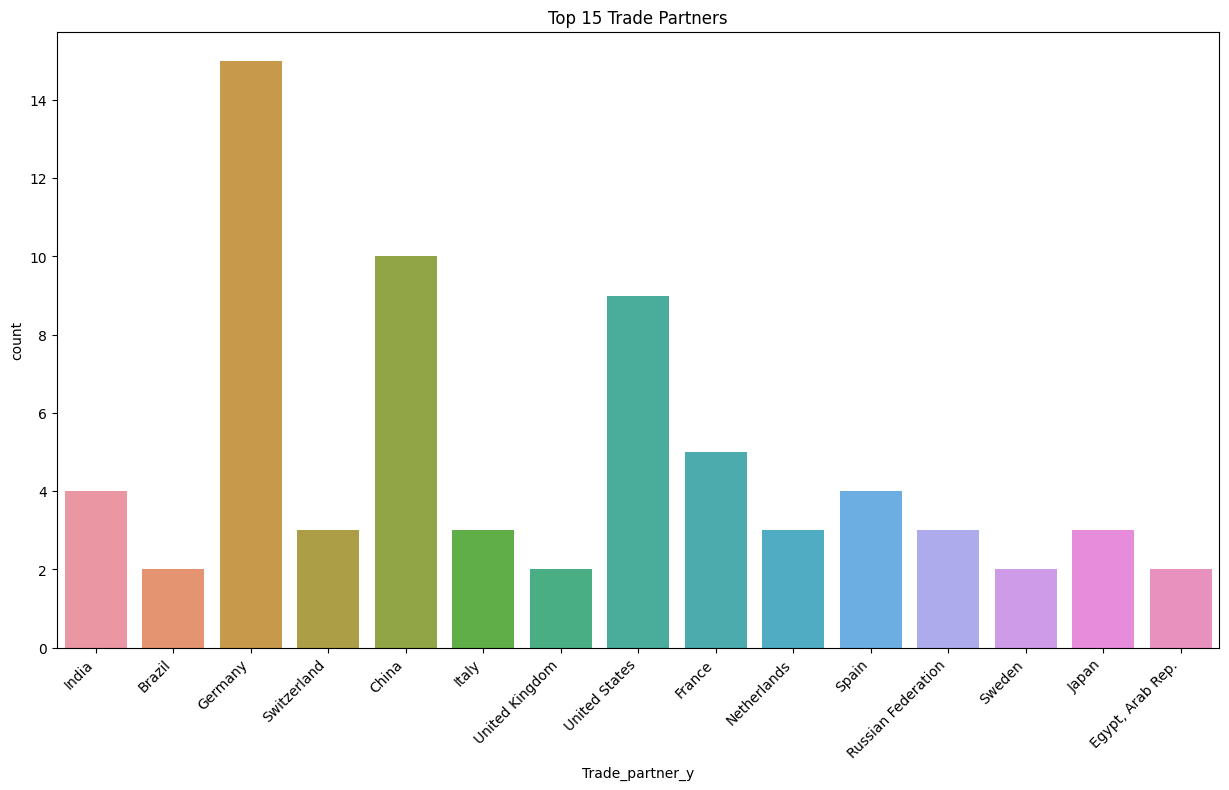

In [33]:
top_trade_partners = merged_2017_To_2019['Trade_partner_y'].value_counts().nlargest(15).index

plt.figure(figsize=(15, 8))
sns.countplot(x='Trade_partner_y', data=merged_2017_To_2019[merged_2017_To_2019['Trade_partner_y'].isin(top_trade_partners)])
plt.title('Top 15 Trade Partners')
plt.xticks(rotation=45, ha='right')
plt.show()


#Frequency of Trade Products

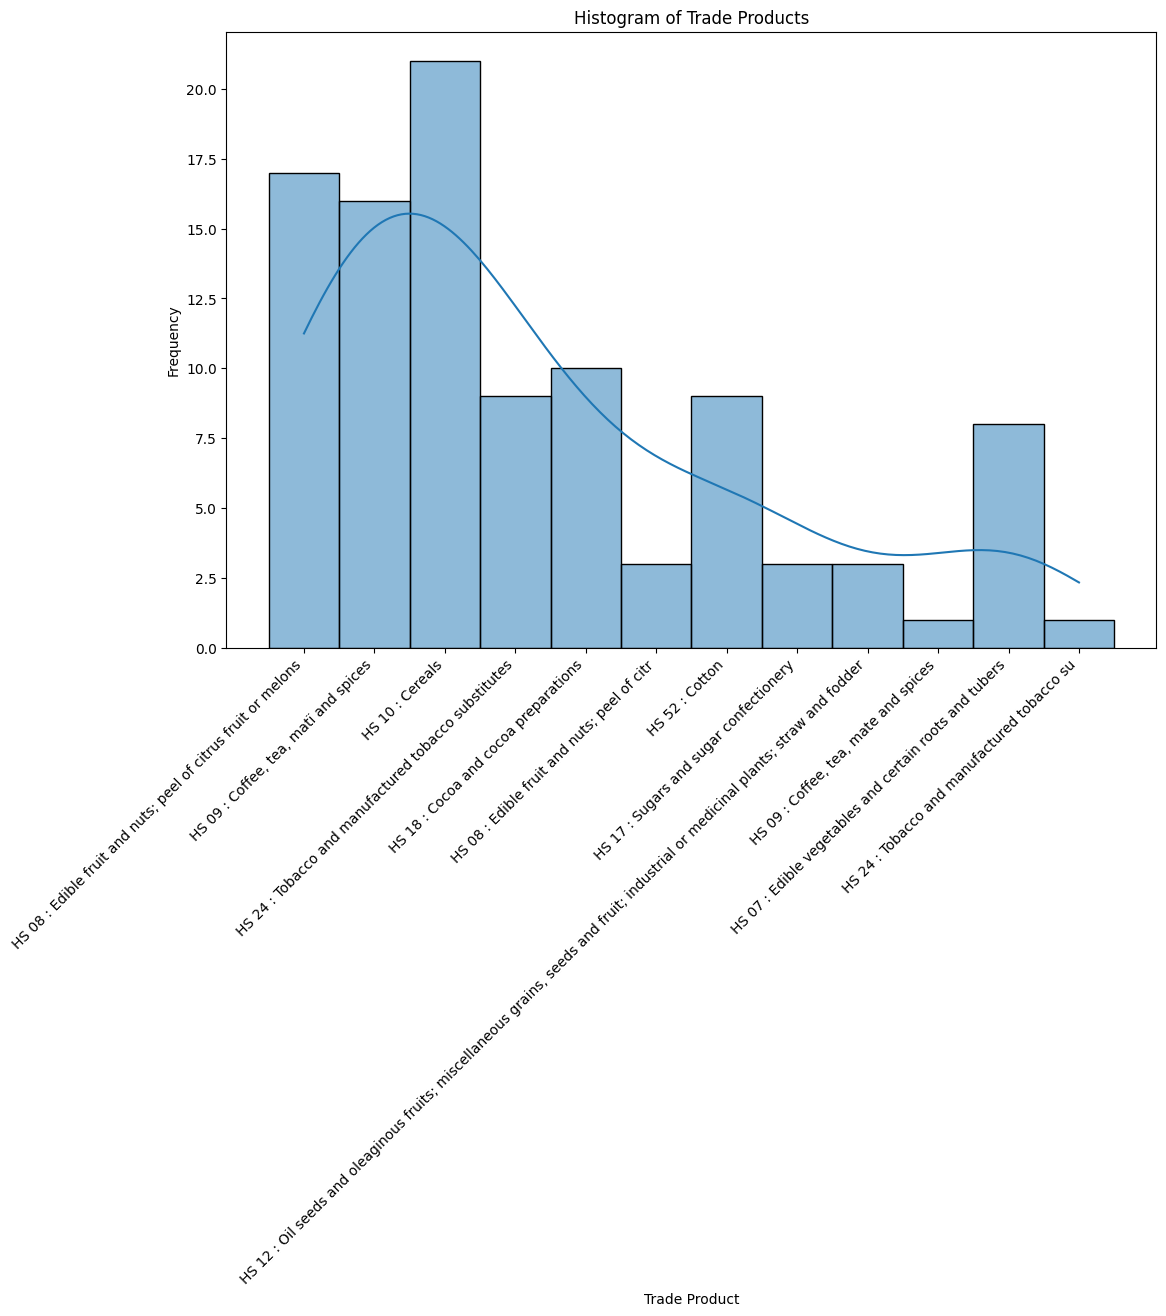

In [34]:
plt.figure(figsize=(12, 8))
sns.histplot(data=merged_2017_To_2019, x='Trade_product_y', bins=20, kde=True)
plt.title('Histogram of Trade Products')
plt.xlabel('Trade Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

#Geospatial Analysis

<ipython-input-35-a9e6ff48fac7>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1500x1000 with 0 Axes>

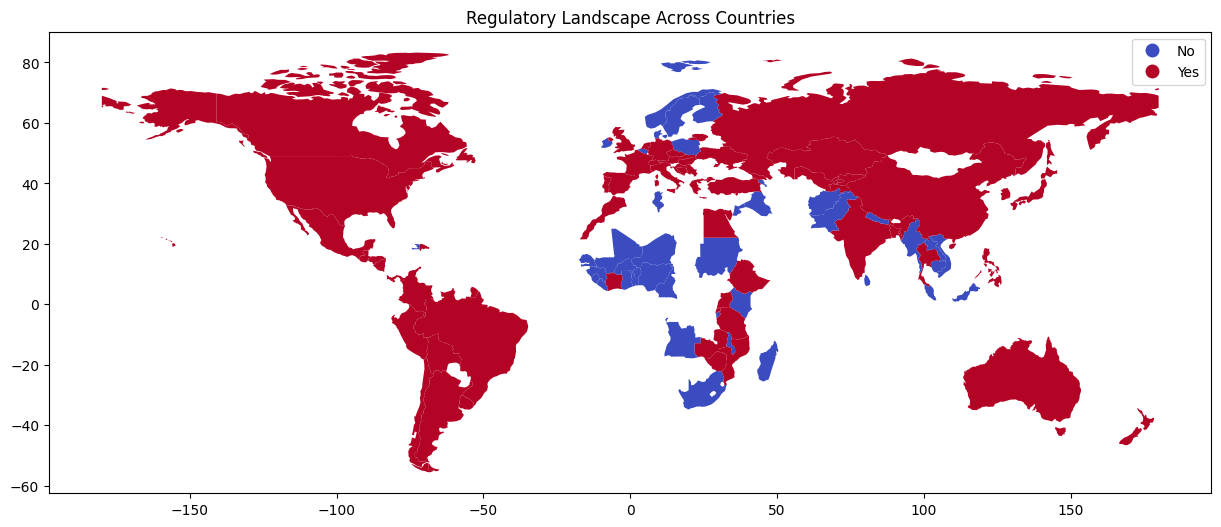

In [35]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_geo = world.merge(merged_2017_To_2019, left_on='iso_a3', right_on='EconomyCode')

plt.figure(figsize=(15, 10))
merged_geo.plot(column='WH_Law_QYN_x', cmap='coolwarm', legend=True, figsize=(15, 10))
plt.title('Regulatory Landscape Across Countries')
plt.show()

#Correlation matrix

<ipython-input-36-e367c98044ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_2017_To_2019.corr()


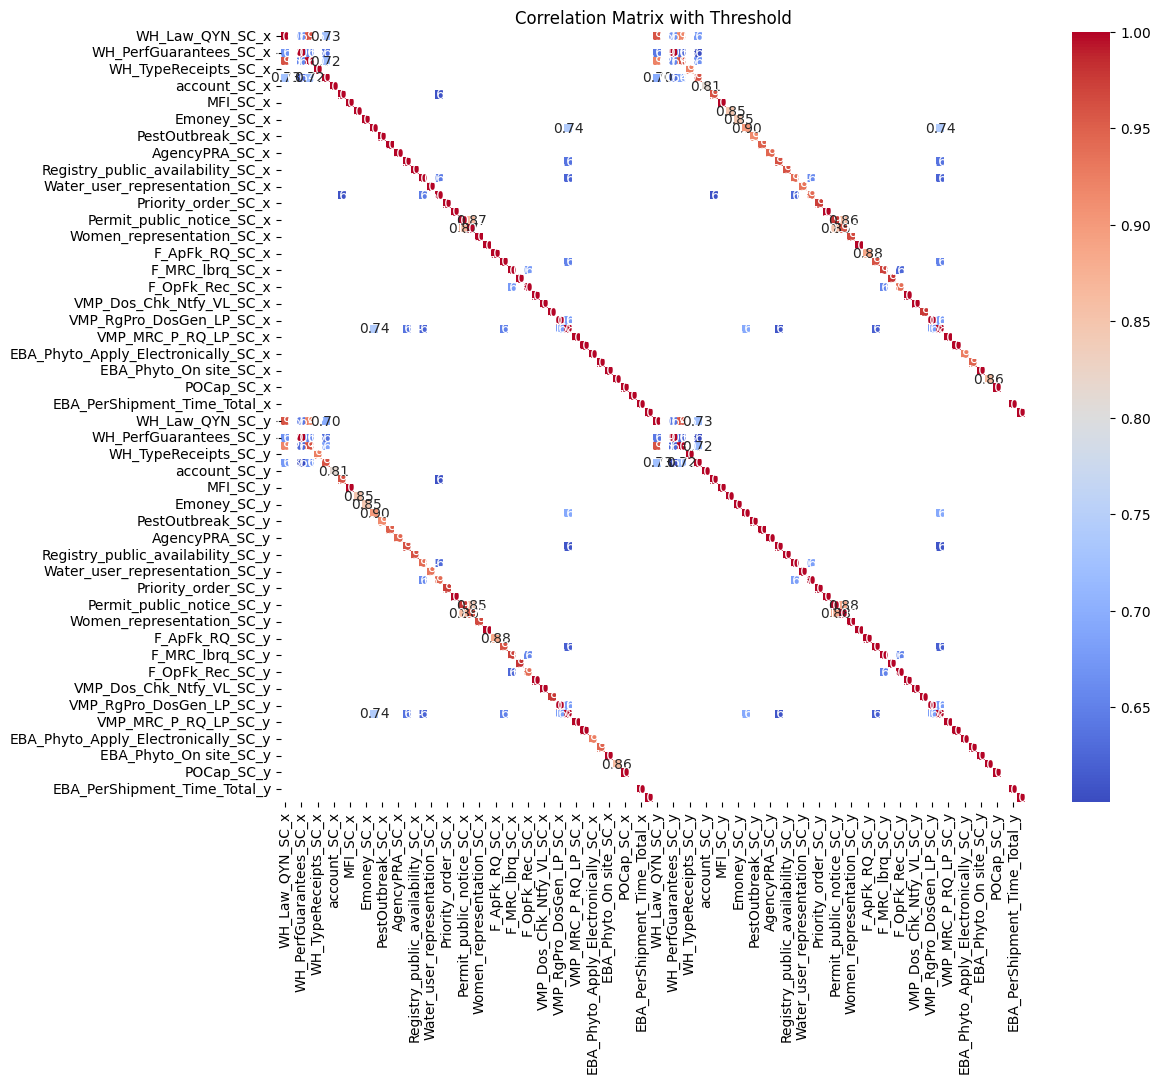

In [36]:
correlation_matrix = merged_2017_To_2019.corr()

mask = correlation_matrix.abs() < 0.6
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", mask=mask)
plt.title('Correlation Matrix with Threshold')
plt.show()

#Machine Learning Model

#Model of Linear Regression

In [37]:
target_variable = 'EBA_PerShipment_Cost_Total_y'

X = merged_2017_To_2019.drop([target_variable, 'EconomyCode', 'EconomyName_x_x'], axis=1)
y = merged_2017_To_2019[target_variable]

X = X.fillna(0)

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.01
R-squared: 1.00


#Confusion Matrix Of Linear Regression

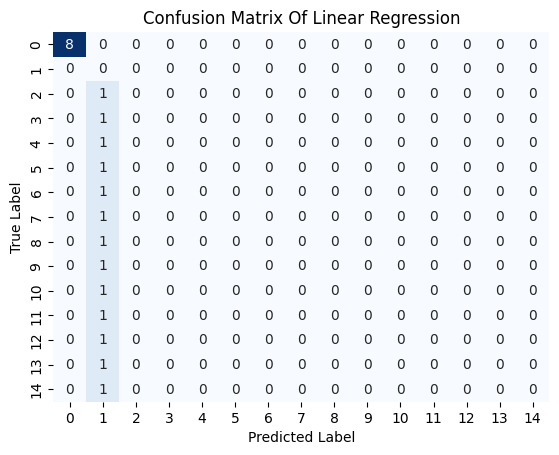

In [38]:
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Of Linear Regression")
plt.show()


#Model of Logistic Regression

In [39]:
target_variable = 'EBA_PerShipment_Cost_Total_y'

y_binary = (y > y.median()).astype(int)

X = merged_2017_To_2019.drop([target_variable, 'EconomyCode', 'EconomyName_x_x'], axis=1)
y = y_binary

X = X.fillna(0)

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_reg_model = LogisticRegression(random_state=42)
logistic_reg_model.fit(X_train, y_train)

y_pred_proba = logistic_reg_model.predict_proba(X_test)[:, 1]
y_pred_class = logistic_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_class)
report = classification_report(y_test, y_pred_class)


mse = mean_squared_error(y_test, y_pred_proba)
r2 = r2_score(y_test, y_pred_proba)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.00
R-squared: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Confusion Matrix Of Logistic Regression

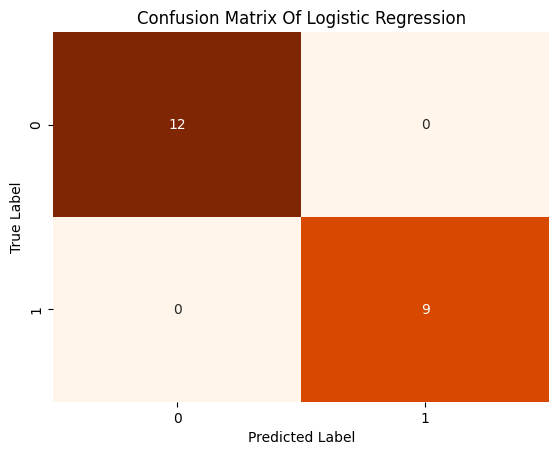

In [40]:
threshold = 0.5
y_pred_binary = (y_pred_proba > threshold).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Of Logistic Regression")
plt.show()

#Comparison Model of Logistic Regression and Linear Regression

Text(0.5, 1.0, 'Linear Regression Predictions vs Actual')

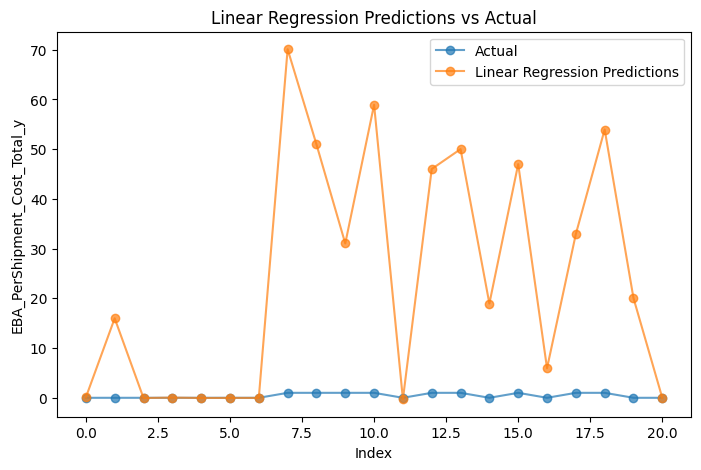

In [41]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o', linestyle='-', alpha=0.7)
plt.plot(range(len(y_test)), y_pred, label='Linear Regression Predictions', marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('EBA_PerShipment_Cost_Total_y')
plt.legend()
plt.title('Linear Regression Predictions vs Actual')


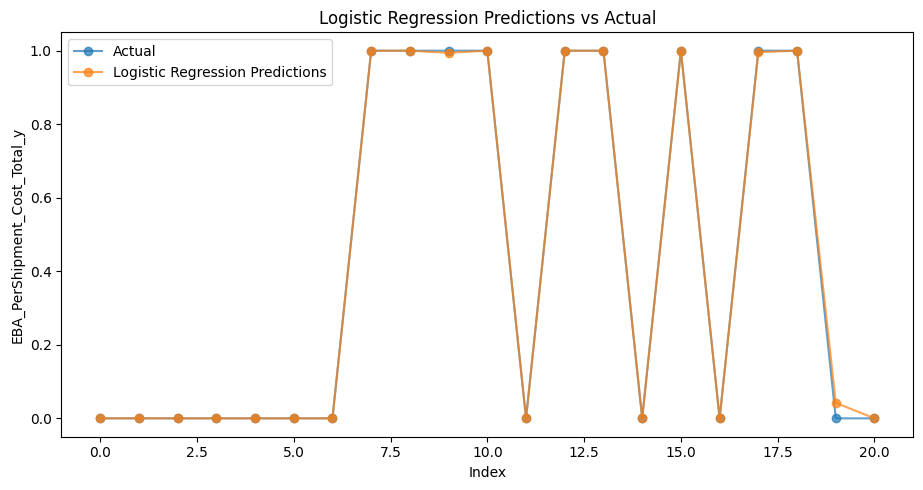

In [42]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 2)
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o', linestyle='-', alpha=0.7)
plt.plot(range(len(y_test)), y_pred_proba, label='Logistic Regression Predictions', marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('EBA_PerShipment_Cost_Total_y')
plt.legend()
plt.title('Logistic Regression Predictions vs Actual')

plt.tight_layout()
plt.show()
